## First benchmark

To benchmark: estimating disassembly indexes for increasing levels of complex peptidomes


        

In [1]:
from disassembly.simulate_proteolysis import enzyme_set, enzyme, amino_acids


kr = enzyme_set(
    [
        enzyme({"K": 1}, "K protease"),
    ],
    [1],
    [1],
)


viat = enzyme_set(
    [
        enzyme({"V": 0.35, "I": 0.25, "A": 0.2, "T": 0.1}, "V+I+A+T protease"),
    ],
    [1],
    [1],
)

random = enzyme_set(
    [enzyme({aa: 1 / len(amino_acids) for aa in amino_acids.values()}, "random")],
    [1],
    [1],
)
protein = "MKAAVLTLAVLFLTGSQARHFWQQDEPPQSPWDRVKDLATVYVDVLKDSGRDYVSQFEGSALGKQLNLKLLDNWDSVTSTFSKLREQLGPVTQEFWDNLEKETEGLRQEMSKDLEEVKAKVQPYLDDFQKKWQEEMELYRQKVEPLRAELQEGARQKLHELQEKLSPLGEEMRDRARAHVDALRTHLAPYSDELRQRLAARLEALKENGGARLAEYHAKATEHLSTLSEKAKPALEDLRQGLLPVLESFKVSFLSALEEYTKKLNTQ"

In [2]:
from disassembly.benchmark import Benchmark

n_iterations = 10
bmrk = Benchmark()

enzyme_sets = [kr, viat, random]
enzyme_names = ["K", "V+I+A+T", "random"]

bmrk.simulate_degradation(
    protein,
    enzyme_sets=enzyme_sets,
    enzyme_names=enzyme_names,
    n_generate=250,
    n_start=10,
    endo_or_exo_probability=[0.9, 0.1],
    iterations=n_iterations,
)

Running K, 0
 31 / 250 (32)

/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


 248 / 250 (288)
53 unique peptides. 253 total

 Averaged DI: 1.47
Running K, 1
 249 / 250 (271)
51 unique peptides. 253 total

 Averaged DI: 1.47
Running K, 2
 249 / 250 (304)
62 unique peptides. 253 total

 Averaged DI: 1.60
Running K, 3
 249 / 250 (300)
53 unique peptides. 253 total

 Averaged DI: 1.43
Running K, 4
 249 / 250 (285)
50 unique peptides. 254 total

 Averaged DI: 1.43
Running K, 5
 249 / 250 (264)
53 unique peptides. 253 total

 Averaged DI: 1.65
Running K, 6
 249 / 250 (287)
54 unique peptides. 253 total

 Averaged DI: 1.58
Running K, 7
 249 / 250 (261)
67 unique peptides. 254 total

 Averaged DI: 1.60
Running K, 8
 249 / 250 (277)
61 unique peptides. 253 total

 Averaged DI: 1.55
Running K, 9
 249 / 250 (276)
56 unique peptides. 253 total

 Averaged DI: 1.57
Running V+I+A+T, 0
 249 / 250 (281)
119 unique peptides. 253 total

 Averaged DI: 1.55
Running V+I+A+T, 1
 249 / 250 (258)
122 unique peptides. 254 total

 Averaged DI: 1.49
Running V+I+A+T, 2
 249 / 250 (278)
113

<Axes: xlabel='d', ylabel='Density'>

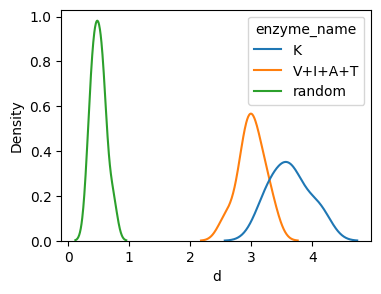

In [3]:
dct = {"enzyme_name": [], "iteration": [], "d": []}

for enzyme_name in bmrk.enzyme_names:
    for iteration in range(bmrk.iterations):
        dct["enzyme_name"].append(enzyme_name)
        dct["iteration"].append(iteration)
        dct["d"].append(bmrk.results["real"][enzyme_name][iteration]["d"])

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dct_df = pd.DataFrame(dct)
plt.figure(figsize=(4, 3))
sns.kdeplot(pd.DataFrame(dct), x="d", hue="enzyme_name")

<Axes: xlabel='di', ylabel='count'>

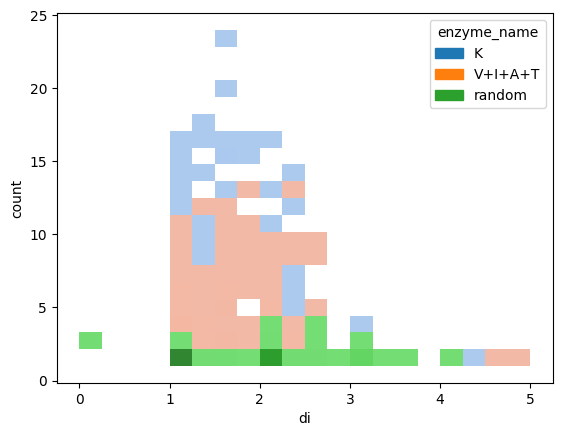

In [4]:
dct = {"peptide": [], "di": [], "count": [], "enzyme_name": []}

for enzyme_name in bmrk.enzyme_names:
    for iteration in range(bmrk.iterations):
        counts = bmrk.simulated_peptidomes[enzyme_name][iteration]
        di = bmrk.results["real"][enzyme_name][iteration]["di"]
        for sequence in counts.keys():
            dct["peptide"].append(sequence)
            dct["di"].append(di[sequence])
            dct["count"].append(counts[sequence])
            dct["enzyme_name"].append(enzyme_name)

dct_df = pd.DataFrame(dct)
sns.histplot(dct_df, x="di", y="count", hue="enzyme_name", bins=20)

---K---
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 184175
Learning rate decreased to 0.5
 104 / 500 | 0.00, mean: 0.00 | Plateau | nz: 184

/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



 Averaged DI: 2.24
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 183167
Learning rate decreased to 0.5
 102 / 500 | 0.00, mean: 0.00 | Plateau | nz: 185
 Averaged DI: 2.18
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 255247
Learning rate decreased to 0.5
 107 / 500 | 0.00, mean: 0.00 | Plateau | nz: 255
 Averaged DI: 2.52
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 175173
Learning rate decreased to 0.5
 103 / 500 | 0.00, mean: 0.00 | Plateau | nz: 175
 Averaged DI: 2.05
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 171155
Learning rate decreased to 0.5
 107 / 500 | 0.00, mean: 0.00 | Plateau | nz: 171
 Averaged DI: 1.98
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 166165
Learning rate decreased to 0.5
 105 / 500 | 0.00, mean: 0.00 | Plateau | nz: 171
 Averaged DI: 2.02
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 180180
Learning rate decreased to 0.5
 106 / 500 | 0.00, mean: 0.00 | Plateau | nz: 180
 Averaged DI: 2.29
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 278267
Learning rate de

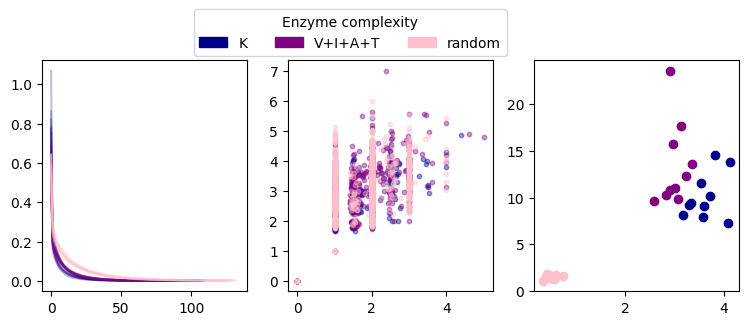

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

bmrk.estimate_weights(method="alg", n_iterations=500, lr=1)

bmrk.plot(axs[0], ptype="loss", method_name="alg")
bmrk.plot(axs[1], ptype="corr_di", method_name="alg")
bmrk.plot(axs[2], ptype="d", method_name="alg")

---K---
 499 / 500 | 0.02, kl: 0.02, reg: 0.00  | nz: 157 | 
 Averaged DI: 2.07
 499 / 500 | 0.03, kl: 0.03, reg: 0.00  | nz: 147 | 
 Averaged DI: 2.03
 499 / 500 | 0.12, kl: 0.12, reg: 0.00  | nz: 233 | 
 Averaged DI: 2.32
 499 / 500 | 0.06, kl: 0.06, reg: 0.00  | nz: 141 | 
 Averaged DI: 1.94
 499 / 500 | 0.05, kl: 0.05, reg: 0.00  | nz: 135 | 
 Averaged DI: 1.89
 499 / 500 | 0.09, kl: 0.09, reg: 0.00  | nz: 142 | 
 Averaged DI: 1.97
 499 / 500 | 0.13, kl: 0.13, reg: 0.00  | nz: 176 | 
 Averaged DI: 2.11
 499 / 500 | 0.16, kl: 0.16, reg: 0.00  | nz: 259 | 
 Averaged DI: 2.33
 499 / 500 | 0.03, kl: 0.03, reg: 0.00  | nz: 222 | 
 Averaged DI: 2.19
 499 / 500 | 0.08, kl: 0.08, reg: 0.00  | nz: 169 | 
 Averaged DI: 2.07
---V+I+A+T---
 499 / 500 | 0.01, kl: 0.01, reg: 0.00  | nz: 449 | 
 Averaged DI: 2.29
 499 / 500 | 0.05, kl: 0.05, reg: 0.00  | nz: 534 | 
 Averaged DI: 2.43
 499 / 500 | 0.03, kl: 0.03, reg: 0.00  | nz: 475 | 
 Averaged DI: 2.38
 499 / 500 | 0.04, kl: 0.04, reg: 0.00  | 

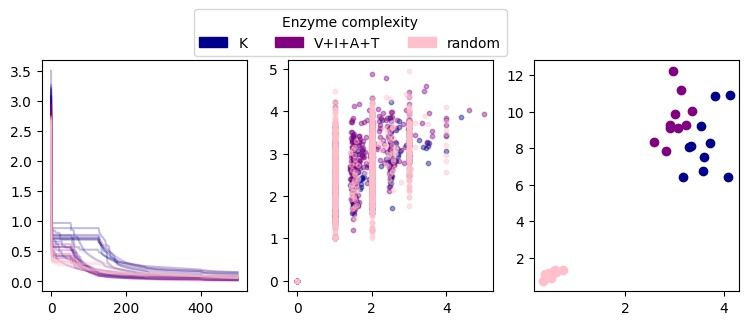

In [6]:
lr_scheduler = {}
steps = [50, 125, 250, 400, 500]
lrs = [1, 0.1, 0.01, 0.001, 0.0001]
for lr, step in zip(lrs, steps):
    for i in range(step):
        if i not in lr_scheduler:
            lr_scheduler[i] = lr

bmrk.estimate_weights(method="gd", lr_scheduler=lr_scheduler, n_iterations=500)

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

bmrk.plot(ax=axs[0], ptype="loss", method_name="gd")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name="gd")
bmrk.plot(ax=axs[2], ptype="d", method_name="gd")

In [7]:
bmrk.estimate_weights(
    method="gd",
    lam1=0.1,
    lr_scheduler=lr_scheduler,
    n_iterations=500,
    method_name="gd_l1",
)

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

bmrk.plot(ax=axs[0], ptype="loss", method_name="gd_l1")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name="gd_l1")
bmrk.plot(ax=axs[2], ptype="d", method_name="gd_l1")

---K---
 499 / 500 | 1.58, kl: 0.05, reg: 1.53  | nz: 157 | 
 Averaged DI: 2.10
 499 / 500 | 1.31, kl: 0.02, reg: 1.29  | nz: 138 | 
 Averaged DI: 2.01
 499 / 500 | 2.03, kl: 0.02, reg: 2.00  | nz: 228 | 
 Averaged DI: 2.36
 499 / 500 | 1.31, kl: 0.00, reg: 1.30  | nz: 149 | 
 Averaged DI: 1.90
 499 / 500 | 1.47, kl: 0.10, reg: 1.38  | nz: 134 | 
 Averaged DI: 1.85
 499 / 500 | 1.35, kl: 0.02, reg: 1.33  | nz: 150 | 
 Averaged DI: 1.93
 499 / 500 | 1.68, kl: 0.08, reg: 1.60  | nz: 168 | 
 Averaged DI: 2.08
 499 / 500 | 2.24, kl: 0.10, reg: 2.13  | nz: 247 | 
 Averaged DI: 2.29
 499 / 500 | 1.80, kl: 0.00, reg: 1.80  | nz: 220 | 
 Averaged DI: 2.15
 499 / 500 | 1.69, kl: 0.05, reg: 1.64  | nz: 167 | 
 Averaged DI: 2.05
---V+I+A+T---
 499 / 500 | 2.83, kl: 0.00, reg: 2.83  | nz: 449 | 
 Averaged DI: 2.22
 499 / 500 | 3.52, kl: 0.00, reg: 3.52  | nz: 531 | 
 Averaged DI: 2.32
 499 / 500 | 2.84, kl: 0.00, reg: 2.84  | nz: 475 | 
 Averaged DI: 2.31
 499 / 500 | 3.13, kl: 0.01, reg: 3.12  | 

KeyboardInterrupt: 

---K---
 499 / 500 | 0.26, kl: 0.00, reg: 0.25  | nz: 123 | 
 Averaged DI: 2.05
 499 / 500 | 0.23, kl: 0.00, reg: 0.23  | nz: 103 | 
 Averaged DI: 1.90
 499 / 500 | 0.17, kl: 0.00, reg: 0.17  | nz: 74 | 
 Averaged DI: 1.68
 499 / 500 | 0.31, kl: 0.00, reg: 0.31  | nz: 96 | 
 Averaged DI: 1.79
 499 / 500 | 0.29, kl: 0.01, reg: 0.28  | nz: 98 |  
 Averaged DI: 1.66
---V+I+A+T---
 499 / 500 | 0.24, kl: 0.00, reg: 0.24  | nz: 181 | 
 Averaged DI: 1.82
 499 / 500 | 0.33, kl: 0.00, reg: 0.33  | nz: 241 | 
 Averaged DI: 2.06
 499 / 500 | 0.25, kl: 0.00, reg: 0.25  | nz: 158 | 
 Averaged DI: 1.73
 499 / 500 | 0.29, kl: 0.00, reg: 0.29  | nz: 194 | 
 Averaged DI: 1.83
 499 / 500 | 0.29, kl: 0.00, reg: 0.29  | nz: 150 | 
 Averaged DI: 1.87
---random---
 499 / 500 | 0.13, kl: 0.00, reg: 0.13  | nz: 226 | 
 Averaged DI: 1.70
 499 / 500 | 0.16, kl: 0.00, reg: 0.16  | nz: 265 | 
 Averaged DI: 1.82
 499 / 500 | 0.15, kl: 0.00, reg: 0.15  | nz: 252 | 
 Averaged DI: 1.78
 499 / 500 | 0.14, kl: 0.00, re

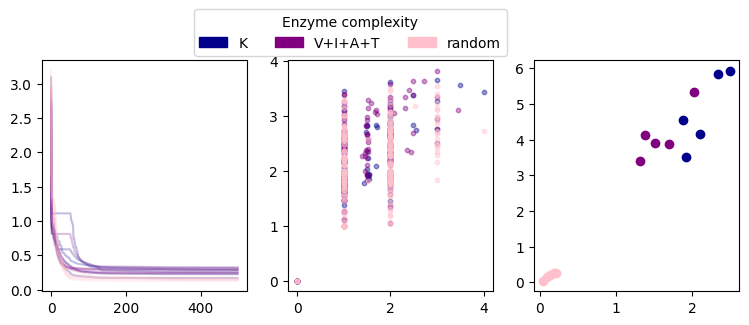

In [ ]:
bmrk.estimate_weights(
    method="gd",
    lam2=0.1,
    lr_scheduler=lr_scheduler,
    n_iterations=500,
    method_name="gd_l2",
)

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

bmrk.plot(ax=axs[0], ptype="loss", method_name="gd_l2")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name="gd_l2")
bmrk.plot(ax=axs[2], ptype="d", method_name="gd_l2")

---K---
104
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 27.41 | 28.15
V better!
	V: 27.31 | 27.41
V better!
	V: 27.95 | 27.31
	I: 26.95 | 27.31
I better!
	I: 28.19 | 26.95
	L: 28.26 | 26.95
	E: 28.38 | 26.95
	Q: 27.27 | 26.95
	D: 28.12 | 26.95
	N: 27.79 | 26.95
	H: 28.20 | 26.95
	W: 28.21 | 26.95
	F: 27.92 | 26.95
	Y: 28.17 | 26.95
	R: 28.20 | 26.95
	K: 24.27 | 26.95
K better!
	K: 19.42 | 24.27
K better!
	K: 12.54 | 19.42
K better!
	K: 15.75 | 12.54
	S: 15.74 | 12.54
	T: 16.03 | 12.54
	M: 13.39 | 12.54
	A: 15.37 | 12.54
	G: 14.84 | 12.54
	P: 13.39 | 12.54
	C: 11.48 | 12.54
C better!
	C: 14.80 | 11.48
 exo: 17.52 | 12.83 (0.20)
 exo: 15.46 | 12.83 (0.20)
 exo: 14.99 | 12.83 (0.20)
 exo: 14.26 | 12.83 (0.20)
 exo: 16.59 | 12.83 (0.20)
 exo: 16.45 | 12.83 (0.20)
 exo: 14.37 | 12.83 (0.20)
 exo: 15.75 | 12.83 (0.20)
 exo: 13.38 | 12.83 (0.20)
 exo: 14.78 | 12.83 (0.20)

 Averaged DI: 2.12
 499 / 500 | 0.01, kl: 0.01, reg: 0.00  | nz: 128 | 
 Averaged DI: 2.09
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 27.67 | 27.44
	I: 28.16 | 27.44
	L: 27.61 | 27.44
	E: 27.82 | 27.44
	Q: 27.89 | 27.44
	D: 27.79 | 27.44
	N: 27.76 | 27.44
	H: 27.89 | 27.44
	W: 28.18 | 27.44
	F: 27.76 | 27.44
	Y: 27.64 | 27.44
	R: 28.30 | 27.44
	K: 22.48 | 27.44
K better!
	K: 14.43 | 22.48
K better!
	K: 11.90 | 14.43
K better!
	K: 10.68 | 11.90
K better!
	K: 15.24 | 10.68
	S: 14.83 | 10.68
	T: 16.33 | 10.68
	M: 12.65 | 10.68
	A: 12.55 | 10.68
	G: 13.45 | 10.68
	P: 14.67 | 10.68
	C: 10.23 | 10.68
C better!
	C: 10.34 | 10.23
 exo: 13.04 | 13.04 (0.25)
 exo: 11.91 | 11.91 (0.30)
 exo: 15.27 | 11.91 (0.30)
 exo: 15.52 | 11.91 (0.30)
 exo: 14.55 | 11.91 (0.30)
 exo: 13.00 | 11.91 (0.30)
 exo: 12.43 | 11.91 (0.30)
 exo: 13.52 | 11.91 (0.30)
 exo: 15.37 | 11.91 (0.30)
 exo: 12.68 | 11.91 (0.30)

 Averaged DI: 1.90
 499 / 500 | 0.02, kl: 0.02, reg: 0.00  | nz: 104 | 
 Averaged DI: 1.86
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 28.46 | 28.19
	I: 28.18 | 28.19
I better!
	I: 27.63 | 28.18
I better!
	I: 28.19 | 27.63
	L: 28.23 | 27.63
	E: 28.48 | 27.63
	Q: 28.51 | 27.63
	D: 28.20 | 27.63
	N: 27.63 | 27.63
	H: 27.48 | 27.63
H better!
	H: 28.46 | 27.48
	W: 27.59 | 27.48
	F: 28.42 | 27.48
	Y: 26.63 | 27.48
Y better!
	Y: 27.85 | 26.63
	R: 28.49 | 26.63
	K: 24.19 | 26.63
K better!
	K: 17.48 | 24.19
K better!
	K: 14.73 | 17.48
K better!
	K: 10.28 | 14.73
K better!
	K: 11.86 | 10.28
	S: 12.86 | 10.28
	T: 11.99 | 10.28
	M: 13.05 | 10.28
	A: 16.20 | 10.28
	G: 10.23 | 10.28
G better!
	G: 12.40 | 10.23
	P: 14.56 | 10.23
	C: 11.24 | 10.23
 exo: 11.03 | 11.03 (0.15)
 exo: 8.20 | 8.20 (0.20)
 exo: 12.65 | 8.20 (0.20)
 exo: 13.90 | 8.20 (0.20)
 exo: 13.87 | 8.20 (0.20)
 exo: 10.48 | 8.20 (0.20)
 exo: 16.54 | 8.20 (0.20)
 exo: 13.68 | 8.20 (0.20)
 exo: 11.88 | 8.20 (0.20)
 exo: 16.12 | 8.20 (0.20)

 Averaged DI: 1.77
 251 / 500 | 0.01, kl: 0.01, reg: 0.00  | nz: 74 | 
 Averaged DI: 1.79
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 28.30 | 27.30
	I: 26.92 | 27.30
I better!
	I: 27.43 | 26.92
	L: 27.37 | 26.92
	E: 27.47 | 26.92
	Q: 26.89 | 26.92
Q better!
	Q: 27.72 | 26.89
	D: 28.24 | 26.89
	N: 27.56 | 26.89
	H: 28.21 | 26.89
	W: 28.29 | 26.89
	F: 28.30 | 26.89
	Y: 27.51 | 26.89
	R: 28.25 | 26.89
	K: 23.51 | 26.89
K better!
	K: 19.40 | 23.51
K better!
	K: 13.23 | 19.40
K better!
	K: 13.50 | 13.23
	S: 11.06 | 13.23
S better!
	S: 15.11 | 11.06
	T: 18.73 | 11.06
	M: 16.22 | 11.06
	A: 15.36 | 11.06
	G: 18.00 | 11.06
	P: 15.93 | 11.06
	C: 14.60 | 11.06
 exo: 12.87 | 12.87 (0.25)
 exo: 12.24 | 12.24 (0.30)
 exo: 10.84 | 10.84 (0.25)
 exo: 14.29 | 10.84 (0.25)
 exo: 18.40 | 10.84 (0.25)
 exo: 11.96 | 10.84 (0.25)
 exo: 18.37 | 10.84 (0.25)
 exo: 15.90 | 10.84 (0.25)
 exo: 15.04 | 10.84 (0.25)
 exo: 19.48 | 10.84 (0.25)

 Averaged DI: 1.79
 301 / 500 | 0.01, kl: 0.01, reg: 0.00  | nz: 98 | 
 Averaged DI: 1.76
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 27.97 | 28.17
V better!
	V: 28.35 | 27.97
	I: 27.75 | 27.97
I better!
	I: 27.93 | 27.75
	L: 28.26 | 27.75
	E: 28.22 | 27.75
	Q: 28.10 | 27.75
	D: 28.18 | 27.75
	N: 26.93 | 27.75
N better!
	N: 28.23 | 26.93
	H: 28.25 | 26.93
	W: 27.57 | 26.93
	F: 27.92 | 26.93
	Y: 26.72 | 26.93
Y better!
	Y: 26.79 | 26.72
	R: 26.88 | 26.72
	K: 21.18 | 26.72
K better!
	K: 19.54 | 21.18
K better!
	K: 18.95 | 19.54
K better!
	K: 17.04 | 18.95
K better!
	K: 15.32 | 17.04
K better!
	K: 15.61 | 15.32
	S: 16.44 | 15.32
	T: 14.78 | 15.32
T better!
	T: 17.62 | 14.78
	M: 15.39 | 14.78
	A: 14.08 | 14.78
A better!
	A: 16.34 | 14.08
	G: 16.76 | 14.08
	P: 18.29 | 14.08
	C: 15.68 | 14.08
 exo: 16.73 | 15.20 (0.20)
 exo: 16.16 | 15.20 (0.20)
 exo: 15.59 | 15.20 (0.20)
 exo: 16.83 | 15.20 (0.20)
 exo: 15.42 | 15.20 (0.20)
 exo: 17.45 | 15.20 (0.20)
 exo: 18.60 | 15.20 (0.20)
 exo: 14.56 | 14.56 (0.15)
 exo: 16.57 | 14.56 (0.15)
 exo: 12.84 | 12.84 (0.20)

 Averaged DI: 1.80
 329 / 500 | 0.01, kl: 0.01, reg: 0.00  | 

/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 24.30 | 26.81
V better!
	V: 24.56 | 24.30
	I: 25.93 | 24.30
	L: 24.99 | 24.30
	E: 24.22 | 24.30
E better!
	E: 24.17 | 24.22
E better!
	E: 22.84 | 24.17
E better!
	E: 25.61 | 22.84
	Q: 25.28 | 22.84
	D: 26.74 | 22.84
	N: 24.10 | 22.84
	H: 26.28 | 22.84
	W: 25.62 | 22.84
	F: 26.71 | 22.84
	Y: 25.68 | 22.84
	R: 25.95 | 22.84
	K: 26.28 | 22.84
	S: 25.91 | 22.84
	T: 24.63 | 22.84
	M: 25.44 | 22.84
	A: 21.13 | 22.84
A better!
	A: 23.64 | 21.13
	G: 22.68 | 21.13
	P: 23.53 | 21.13
	C: 24.39 | 21.13
 exo: 22.20 | 22.20 (0.15)
 exo: 25.14 | 22.20 (0.15)
 exo: 24.50 | 22.20 (0.15)
 exo: 22.08 | 22.08 (0.10)
 exo: 23.83 | 22.08 (0.10)
 exo: 22.57 | 22.08 (0.10)
 exo: 22.00 | 22.00 (0.05)
 exo: 23.88 | 22.00 (0.05)
 exo: 21.98 | 21.98 (0.10)
 exo: 22.50 | 21.98 (0.10)

 Averaged DI: 2.01
 499 / 500 | 0.02, kl: 0.02, reg: 0.00  | nz: 172 | 
 Averaged DI: 1.90
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 26.61 | 26.53
	I: 27.15 | 26.53
	L: 27.36 | 26.53
	E: 27.22 | 26.53
	Q: 27.62 | 26.53
	D: 27.32 | 26.53
	N: 26.74 | 26.53
	H: 27.39 | 26.53
	W: 26.76 | 26.53
	F: 26.48 | 26.53
F better!
	F: 26.95 | 26.48
	Y: 27.07 | 26.48
	R: 27.02 | 26.48
	K: 27.35 | 26.48
	S: 27.29 | 26.48
	T: 26.49 | 26.48
	M: 26.46 | 26.48
M better!
	M: 27.61 | 26.46
	A: 24.54 | 26.46
A better!
	A: 24.46 | 24.54
A better!
	A: 23.10 | 24.46
A better!
	A: 23.60 | 23.10
	G: 24.50 | 23.10
	P: 22.11 | 23.10
P better!
	P: 25.22 | 22.11
	C: 22.47 | 22.11
 exo: 23.91 | 23.91 (0.15)
 exo: 25.31 | 23.91 (0.15)
 exo: 24.23 | 23.91 (0.15)
 exo: 24.10 | 23.91 (0.15)
 exo: 23.43 | 23.43 (0.10)
 exo: 21.37 | 21.37 (0.15)
 exo: 24.34 | 21.37 (0.15)
 exo: 24.72 | 21.37 (0.15)
 exo: 22.58 | 21.37 (0.15)
 exo: 22.84 | 21.37 (0.15)

 Averaged DI: 2.14
 265 / 500 | 0.01, kl: 0.01, reg: 0.00  | nz: 241 | 
 Averaged DI: 2.04
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 25.09 | 26.65
V better!
	V: 25.57 | 25.09
	I: 22.16 | 25.09
I better!
	I: 25.93 | 22.16
	L: 26.76 | 22.16
	E: 24.35 | 22.16
	Q: 25.35 | 22.16
	D: 25.43 | 22.16
	N: 25.47 | 22.16
	H: 26.50 | 22.16
	W: 27.67 | 22.16
	F: 24.55 | 22.16
	Y: 25.78 | 22.16
	R: 24.83 | 22.16
	K: 26.93 | 22.16
	S: 24.73 | 22.16
	T: 25.37 | 22.16
	M: 26.00 | 22.16
	A: 24.67 | 22.16
	G: 26.71 | 22.16
	P: 25.52 | 22.16
	C: 26.09 | 22.16
 exo: 25.01 | 25.01 (0.15)
 exo: 23.27 | 23.27 (0.20)
 exo: 25.17 | 23.27 (0.20)
 exo: 25.18 | 23.27 (0.20)
 exo: 25.38 | 23.27 (0.20)
 exo: 25.03 | 23.27 (0.20)
 exo: 25.74 | 23.27 (0.20)
 exo: 24.89 | 23.27 (0.20)
 exo: 23.61 | 23.27 (0.20)
 exo: 24.85 | 23.27 (0.20)

 Averaged DI: 1.79
 410 / 500 | 0.01, kl: 0.01, reg: 0.00  | nz: 158 | 
 Averaged DI: 1.74
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 25.15 | 27.17
V better!
	V: 24.92 | 25.15
V better!
	V: 24.46 | 24.92
V better!
	V: 24.14 | 24.46
V better!
	V: 23.96 | 24.14
V better!
	V: 23.30 | 23.96
V better!
	V: 21.31 | 23.30
V better!
	V: 23.77 | 21.31
	I: 22.44 | 21.31
	L: 25.50 | 21.31
	E: 22.63 | 21.31
	Q: 24.33 | 21.31
	D: 25.99 | 21.31
	N: 22.82 | 21.31
	H: 22.55 | 21.31
	W: 23.13 | 21.31
	F: 22.52 | 21.31
	Y: 21.93 | 21.31
	R: 25.03 | 21.31
	K: 23.69 | 21.31
	S: 24.64 | 21.31
	T: 22.41 | 21.31
	M: 22.67 | 21.31
	A: 20.42 | 21.31
A better!
	A: 21.65 | 20.42
	G: 21.87 | 20.42
	P: 23.64 | 20.42
	C: 22.53 | 20.42
 exo: 21.44 | 21.44 (0.25)
 exo: 23.59 | 21.44 (0.25)
 exo: 21.80 | 21.44 (0.25)
 exo: 22.61 | 21.44 (0.25)
 exo: 20.64 | 20.64 (0.30)
 exo: 25.65 | 20.64 (0.30)
 exo: 20.15 | 20.15 (0.25)
 exo: 20.01 | 20.01 (0.30)
 exo: 22.25 | 20.01 (0.30)
 exo: 17.99 | 17.99 (0.25)

 Averaged DI: 1.91
 414 / 500 | 0.01, kl: 0.01, reg: 0.00  | nz: 194 | 
 Averaged DI: 1.83
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 23.96 | 26.69
V better!
	V: 22.08 | 23.96
V better!
	V: 22.30 | 22.08
	I: 24.05 | 22.08
	L: 25.51 | 22.08
	E: 26.19 | 22.08
	Q: 23.78 | 22.08
	D: 25.61 | 22.08
	N: 23.48 | 22.08
	H: 24.64 | 22.08
	W: 23.60 | 22.08
	F: 20.82 | 22.08
F better!
	F: 22.00 | 20.82
	Y: 23.81 | 20.82
	R: 23.99 | 20.82
	K: 25.24 | 20.82
	S: 24.25 | 20.82
	T: 23.60 | 20.82
	M: 25.02 | 20.82
	A: 23.30 | 20.82
	G: 21.70 | 20.82
	P: 24.20 | 20.82
	C: 22.22 | 20.82
 exo: 23.81 | 23.71 (0.20)
 exo: 22.54 | 22.54 (0.15)
 exo: 22.86 | 22.54 (0.15)
 exo: 23.36 | 22.54 (0.15)
 exo: 23.24 | 22.54 (0.15)
 exo: 23.05 | 22.54 (0.15)
 exo: 22.20 | 22.20 (0.10)
 exo: 23.48 | 22.20 (0.10)
 exo: 22.20 | 22.20 (0.05)
 exo: 21.41 | 21.41 (0.00)

 Averaged DI: 1.89
 487 / 500 | 0.01, kl: 0.01, reg: 0.00  | nz: 139 | 
 Averaged DI: 1.75
---random---
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 26.76 | 25.92
	I: 26.08 | 25.92
	L: 25.51 | 25.92
L better!
	L: 25.83 | 25.51
	E: 25.55 | 25.51
	Q: 25.57 | 25.51
	D: 26.69 | 25.51
	N: 26.42 | 25.51
	H: 25.80 | 25.51
	W: 25.82 | 25.51
	F: 26.24 | 25.51
	Y: 25.17 | 25.51
Y better!
	Y: 26.92 | 25.17
	R: 26.28 | 25.17
	K: 25.89 | 25.17
	S: 26.37 | 25.17
	T: 25.90 | 25.17
	M: 25.90 | 25.17
	A: 25.92 | 25.17
	G: 25.47 | 25.17
	P: 26.43 | 25.17
	C: 26.68 | 25.17
 exo: 26.16 | 25.44 (0.20)
 exo: 25.43 | 25.43 (0.25)
 exo: 26.13 | 25.43 (0.25)
 exo: 26.51 | 25.43 (0.25)
 exo: 27.21 | 25.43 (0.25)
 exo: 26.56 | 25.43 (0.25)
 exo: 26.33 | 25.43 (0.25)
 exo: 25.27 | 25.27 (0.20)
 exo: 27.17 | 25.27 (0.20)
 exo: 26.18 | 25.27 (0.20)

 Averaged DI: 1.84
 499 / 500 | 0.25, kl: 0.25, reg: 0.00  | nz: 202 | 
 Averaged DI: 1.82
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 25.92 | 27.15
V better!
	V: 25.93 | 25.92
	I: 25.28 | 25.92
I better!
	I: 25.38 | 25.28
	L: 26.38 | 25.28
	E: 25.99 | 25.28
	Q: 26.11 | 25.28
	D: 26.23 | 25.28
	N: 25.10 | 25.28
N better!
	N: 25.56 | 25.10
	H: 26.88 | 25.10
	W: 26.53 | 25.10
	F: 26.28 | 25.10
	Y: 26.77 | 25.10
	R: 26.36 | 25.10
	K: 25.98 | 25.10
	S: 25.48 | 25.10
	T: 24.93 | 25.10
T better!
	T: 26.32 | 24.93
	M: 25.34 | 24.93
	A: 26.38 | 24.93
	G: 26.11 | 24.93
	P: 26.64 | 24.93
	C: 26.24 | 24.93
 exo: 26.61 | 26.12 (0.20)
 exo: 25.85 | 25.85 (0.25)
 exo: 25.84 | 25.84 (0.20)
 exo: 25.97 | 25.84 (0.20)
 exo: 25.69 | 25.69 (0.15)
 exo: 25.68 | 25.68 (0.10)
 exo: 25.59 | 25.59 (0.15)
 exo: 25.46 | 25.46 (0.20)
 exo: 26.88 | 25.46 (0.20)
 exo: 26.40 | 25.46 (0.20)

 Averaged DI: 1.96
 499 / 500 | 0.04, kl: 0.04, reg: 0.00  | nz: 245 | 
 Averaged DI: 1.85
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 25.55 | 26.35
V better!
	V: 26.92 | 25.55
	I: 25.80 | 25.55
	L: 25.98 | 25.55
	E: 26.12 | 25.55
	Q: 24.78 | 25.55
Q better!
	Q: 26.32 | 24.78
	D: 26.66 | 24.78
	N: 26.27 | 24.78
	H: 26.27 | 24.78
	W: 25.82 | 24.78
	F: 26.38 | 24.78
	Y: 26.64 | 24.78
	R: 26.94 | 24.78
	K: 25.49 | 24.78
	S: 25.60 | 24.78
	T: 26.29 | 24.78
	M: 26.19 | 24.78
	A: 26.10 | 24.78
	G: 25.32 | 24.78
	P: 25.54 | 24.78
	C: 25.60 | 24.78
 exo: 26.44 | 26.33 (0.20)
 exo: 25.79 | 25.79 (0.25)
 exo: 26.73 | 25.79 (0.25)
 exo: 26.87 | 25.79 (0.25)
 exo: 26.31 | 25.79 (0.25)
 exo: 26.78 | 25.79 (0.25)
 exo: 26.32 | 25.79 (0.25)
 exo: 25.80 | 25.79 (0.25)
 exo: 25.46 | 25.46 (0.30)
 exo: 25.80 | 25.46 (0.30)

 Averaged DI: 1.97
 499 / 500 | 0.20, kl: 0.20, reg: 0.00  | nz: 232 | 
 Averaged DI: 1.89
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 26.89 | 26.62
	I: 26.69 | 26.62
	L: 26.39 | 26.62
L better!
	L: 26.34 | 26.39
L better!
	L: 26.19 | 26.34
L better!
	L: 26.64 | 26.19
	E: 25.67 | 26.19
E better!
	E: 27.24 | 25.67
	Q: 26.52 | 25.67
	D: 26.71 | 25.67
	N: 25.99 | 25.67
	H: 26.57 | 25.67
	W: 26.92 | 25.67
	F: 25.83 | 25.67
	Y: 26.06 | 25.67
	R: 26.87 | 25.67
	K: 24.63 | 25.67
K better!
	K: 26.26 | 24.63
	S: 26.07 | 24.63
	T: 25.84 | 24.63
	M: 26.09 | 24.63
	A: 26.64 | 24.63
	G: 26.35 | 24.63
	P: 27.16 | 24.63
	C: 26.25 | 24.63
 exo: 27.17 | 26.34 (0.20)
 exo: 25.94 | 25.94 (0.15)
 exo: 26.40 | 25.94 (0.15)
 exo: 26.78 | 25.94 (0.15)
 exo: 25.95 | 25.94 (0.15)
 exo: 26.25 | 25.94 (0.15)
 exo: 27.03 | 25.94 (0.15)
 exo: 26.90 | 25.94 (0.15)
 exo: 26.92 | 25.94 (0.15)
 exo: 26.25 | 25.94 (0.15)

 Averaged DI: 1.87
 499 / 500 | 0.28, kl: 0.28, reg: 0.00  | nz: 236 | 
 Averaged DI: 1.84
103
Endo iteration: 0


/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:229: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values())


	V: 26.85 | 25.27
	I: 27.08 | 25.27
	L: 25.88 | 25.27
	E: 26.52 | 25.27
	Q: 26.36 | 25.27
	D: 26.69 | 25.27
	N: 26.23 | 25.27
	H: 26.36 | 25.27
	W: 26.10 | 25.27
	F: 26.50 | 25.27
	Y: 26.92 | 25.27
	R: 25.49 | 25.27
	K: 26.24 | 25.27
	S: 25.88 | 25.27
	T: 25.77 | 25.27
	M: 25.45 | 25.27
	A: 26.65 | 25.27
	G: 26.92 | 25.27
	P: 25.52 | 25.27
	C: 25.49 | 25.27
 exo: 26.37 | 26.37 (0.25)
 exo: 26.04 | 26.04 (0.30)
 exo: 26.09 | 26.04 (0.30)
 exo: 27.25 | 26.04 (0.30)
 exo: 26.86 | 26.04 (0.30)
 exo: 26.36 | 26.04 (0.30)
 exo: 26.14 | 26.04 (0.30)
 exo: 26.44 | 26.04 (0.30)
 exo: 26.73 | 26.04 (0.30)
 exo: 26.30 | 26.04 (0.30)

 Averaged DI: 2.00
 499 / 500 | 0.15, kl: 0.15, reg: 0.00  | nz: 287 | 
 Averaged DI: 1.98


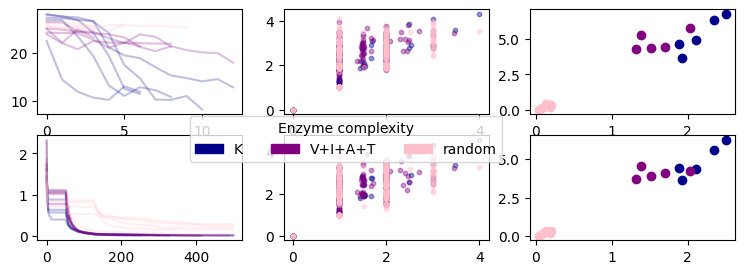

In [ ]:
bmrk.estimate_weights(
    method="gd",
    lr_scheduler=lr_scheduler,
    n_iterations=500,
    lam1=0,
    lam2=0,
    parameter_estimator=True,
    method_name="gd_param",
)

fig, axs = plt.subplots(2, 3, figsize=(9, 3))

bmrk.plot(ax=axs[0, 0], ptype="loss", method_name="param")
bmrk.plot(ax=axs[0, 1], ptype="corr_di", method_name="param")
bmrk.plot(ax=axs[0, 2], ptype="d", method_name="param")

bmrk.plot(ax=axs[1, 0], ptype="loss", method_name="gd_param")
bmrk.plot(ax=axs[1, 1], ptype="corr_di", method_name="gd_param")
bmrk.plot(ax=axs[1, 2], ptype="d", method_name="gd_param")

<Axes: xlabel='enzyme', ylabel='error'>

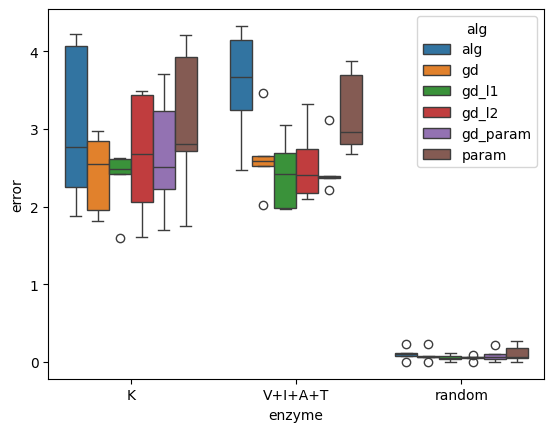

In [ ]:
import pandas as pd
import numpy as np

df = {"alg": [], "enzyme": [], "error": []}
for alg in bmrk.results.keys():
    if alg == "real":
        continue
    for enzyme_name in enzyme_names:

        for iteration in range(5):
            df["alg"].append(alg)
            df["enzyme"].append(enzyme_name)
            df["error"].append(
                np.abs(
                    bmrk.results["real"][enzyme_name][iteration]["d"]
                    - bmrk.results[alg][enzyme_name][iteration]["d"]
                )
            )
df = pd.DataFrame(df)
import seaborn as sns

sns.boxplot(df, x="enzyme", y="error", hue="alg")

# Peptidomes

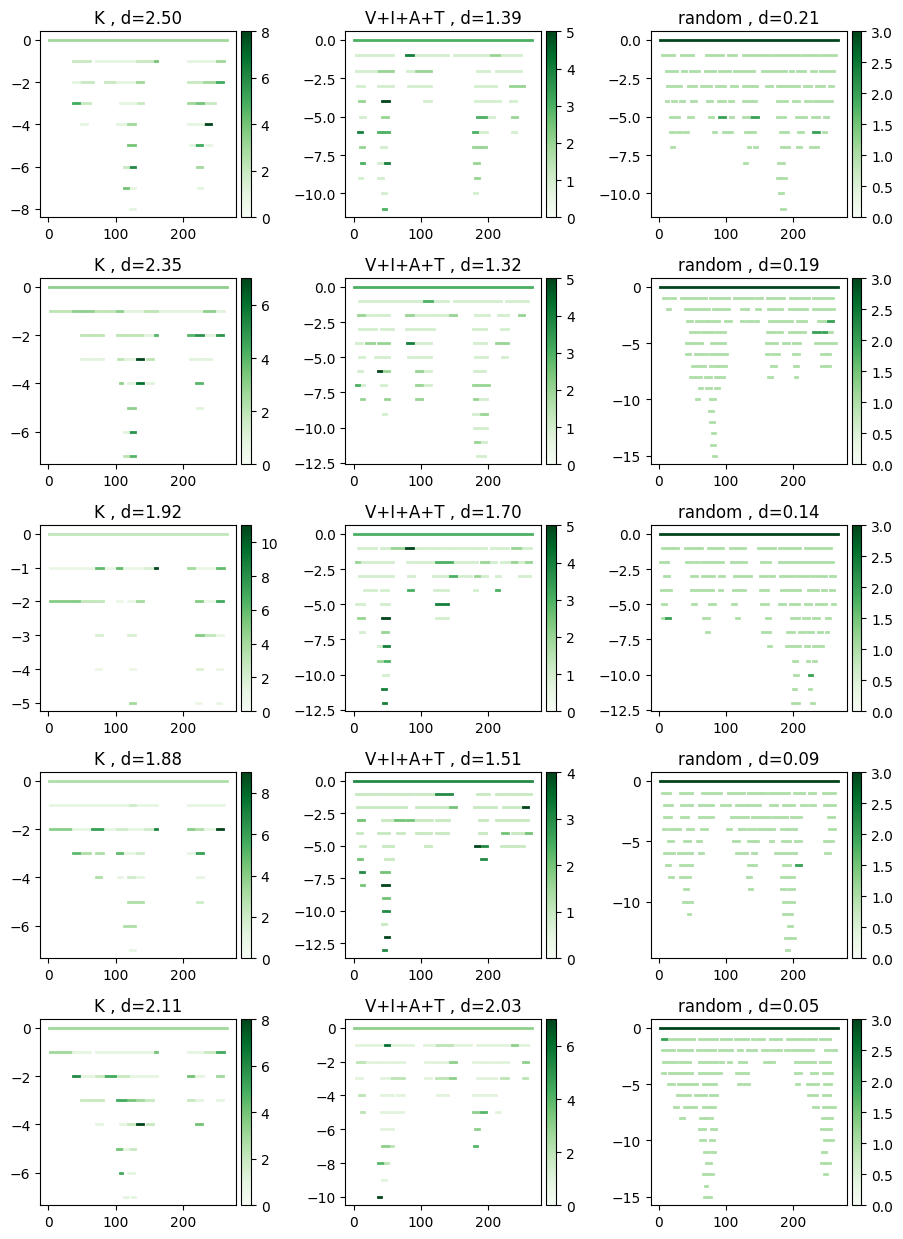

In [ ]:
from disassembly.util import plot_peptidome

fig, axs = plt.subplots(
    bmrk.iterations,
    len(bmrk.enzyme_names),
    figsize=(len(bmrk.enzyme_names) * 3, bmrk.iterations * 2.5),
)
for iteration in range(bmrk.iterations):
    for test_name in bmrk.enzyme_names:
        ax = axs[iteration, bmrk.enzyme_names.index(test_name)]
        ax.set_title(
            f"{test_name} , d={bmrk.results['real'][test_name][iteration]['d']:.2f}"
        )
        plot_peptidome(protein, bmrk.simulated_peptidomes[test_name][iteration], ax)
plt.tight_layout()